# GRIP @ THE SPARKS FOUNDATION # 
###### Name- Rakesh Salunkhe  Batch- oct 2022 ##
###### TASK-1 Predection using Supervised ML
###### (LEVEL-BEGINNER)

###### Predict the percentage of an student based on the no. of study hours.What will be predicted score if a student studies for 9.25 hrs/day.Use R, Python, SAS Enterprise Miner or any other tool.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = "http://bit.ly/w-data"
view_data = pd.read_csv(data)
print("Dataset is visible below",)
view_data

Dataset is visible below


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


discribing the data set

In [3]:
view_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


visualizing the dataset

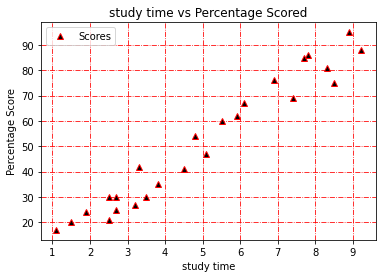

In [29]:
view_data.plot(x='Hours', y='Scores', style='^', markeredgecolor='red', markerfacecolor='Black' )
plt.title('study time vs Percentage Scored')
plt.xlabel('study time')
plt.ylabel('Percentage Score')
plt.grid(True, color='red', linestyle= "-.")
plt.show()

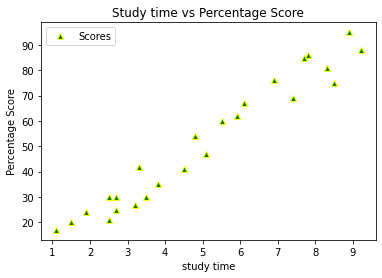

In [31]:
view_data.plot(x='Hours', y='Scores', style='^', markeredgecolor='yellow', markerfacecolor='green' )
plt.title('Study time vs Percentage Score')
plt.xlabel('study time')
plt.ylabel('Percentage Score')
plt.grid(True, color='white', linestyle= "-.")
plt.show()

<AxesSubplot:>

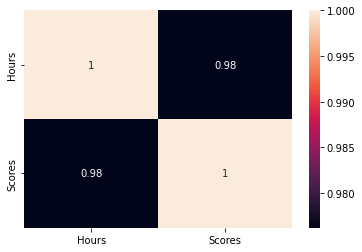

In [34]:
correlation = view_data.corr()
sns.heatmap(correlation,annot=True)

Doing the data manupulation

In [35]:
view_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [36]:
x = view_data.iloc[:, :-1]
y = view_data.iloc[:, 1]

In [37]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [38]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

**Linear Regression Model**

spliting the dataset into traning and testing dataset

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=0)

In [41]:
print('Testing Set')
print(x_test.shape)
print(y_test.shape)

Testing Set
(8, 1)
(8,)


In [42]:
print('Training Set')
print(x_train.shape)
print(y_train.shape)

Training Set
(17, 1)
(17,)


Traning the Model 

In [43]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [44]:
regressor.coef_

array([9.78856669])

In [45]:
regressor.intercept_

2.3708153823418883

Predicting the model

In [46]:
y_pred = regressor.predict(x_test)

In [47]:
y_pred = pd.DataFrame(y_pred, columns=['Predicted Values'])
y_pred.head()

,Predicted Values
0,17.053665
1,33.694229
2,74.806209
3,26.842232
4,60.123359


Plotting regression line and plotting for test data
Here we are plotting and visualising training set and regression line

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


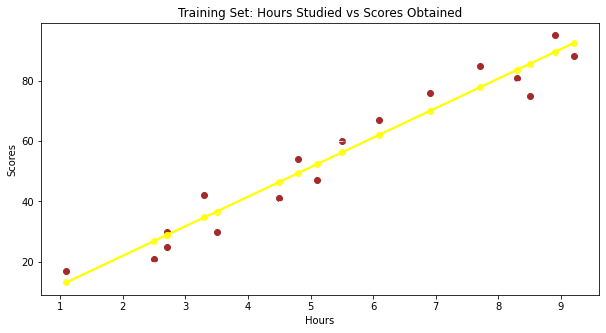

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(x_train, y_train, color='brown')
sns.regplot(x_train, regressor.predict(x_train), color='yellow')
plt.title('Training Set: Hours Studied vs Scores Obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True, color='white', linestyle='-.')
plt.show()

Checking the accuracy scores for training and test set

In [49]:
print('Test Score')
print(regressor.score(x_test, y_test))
print('Training Score')
print(regressor.score(x_train, y_train))

Test Score
0.9568211104435257
Training Score
0.9484997422695115


Making Predictions

Here we are predicting how much does he/she will score if he/she will study for 9.25hrs in a day

In [50]:
hours=9.25
pred = regressor.predict([[hours]])
print('Number of hours = {}' .format(hours))
print('Predicted Score = {}' .format(pred[0]))

Number of hours = 9.25
Predicted Score = 92.91505723477056


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [51]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  4.419727808027651


In [52]:
error = metrics.mean_squared_error(y_test,y_pred)
print('Mean Square Error: ', error)

Mean Square Error:  22.965097212700428


In [53]:
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Square Error:  4.7921912746363144


In [54]:
print('R2 Score: ', metrics.r2_score(y_test, y_pred))

R2 Score:  0.9568211104435257
